# Titanic Survivors - Data Visualization with Pandas and Seaborn
Original dataset can be found [here](https://www.kaggle.com/c/titanic/data). I am using the training data (train.csv).

In [8]:
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")

data = pd.read_csv("data/titanic.csv")

Let's take a look at our dataframe

In [9]:
data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Firstly, we'll show the relationship between the number of survivors and gender and travel classes

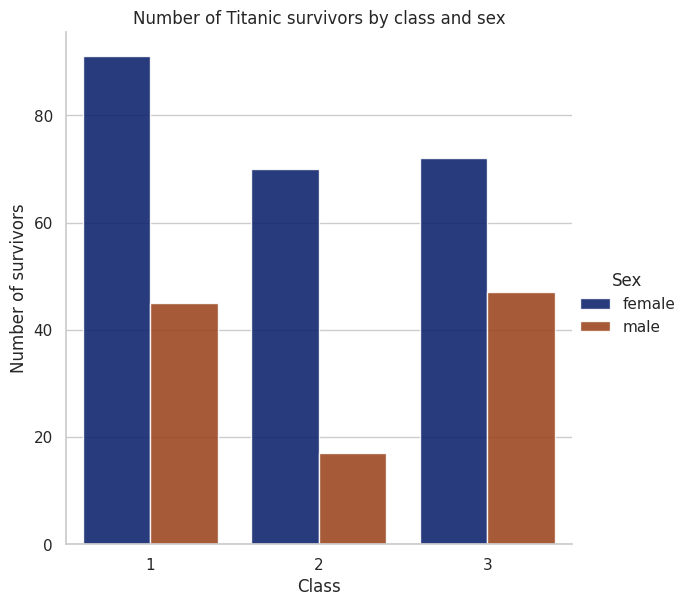

In [10]:
dta = data.groupby(["Sex", "Pclass"], as_index=False)["Survived"].sum()

g = sns.catplot(
    data=dta, kind="bar",
    x="Pclass", y="Survived", hue="Sex", 
    palette="dark", alpha=.9, height=6
).set(title="Number of Titanic survivors by class and sex")
g.set_axis_labels("Class", "Number of survivors")

Let's see the same relationship but now expressed as a percentage

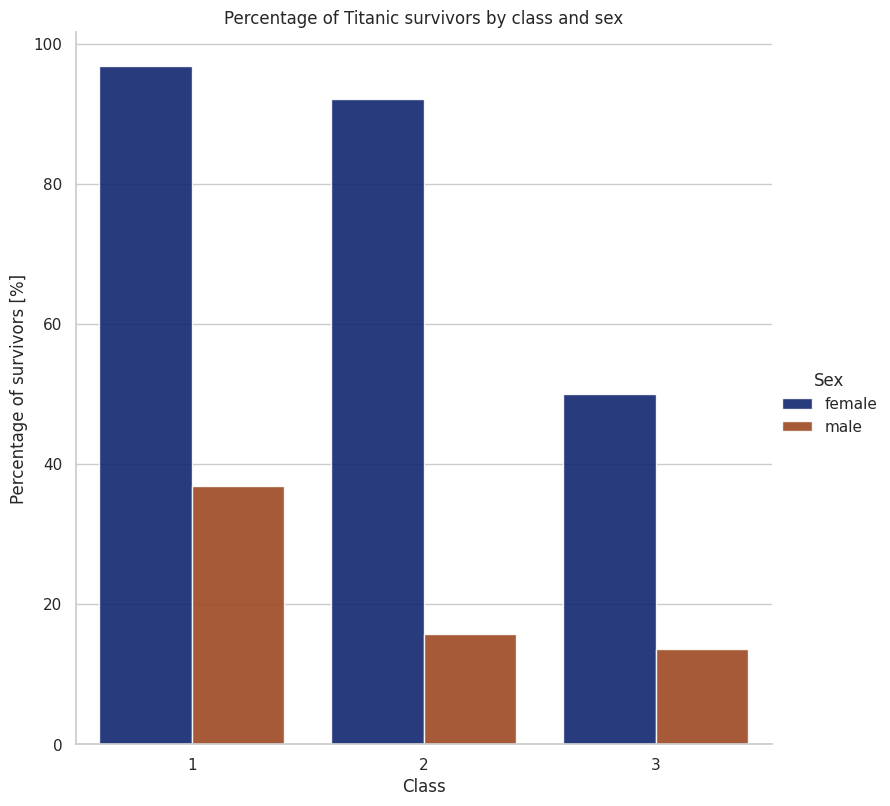

In [11]:
dta = data.groupby(["Sex", "Pclass"], as_index=False)["Survived"].apply(lambda x:
                                                                        100 * x.sum()/x.count())

g = sns.catplot(
    data=dta, kind="bar",
    x="Pclass", y="Survived", hue="Sex",
    palette="dark", alpha=.9, height=8
).set(title="Percentage of Titanic survivors by class and sex")
g.set_axis_labels("Class", "Percentage of survivors [%]")

[Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) showing distribution of passenger fares

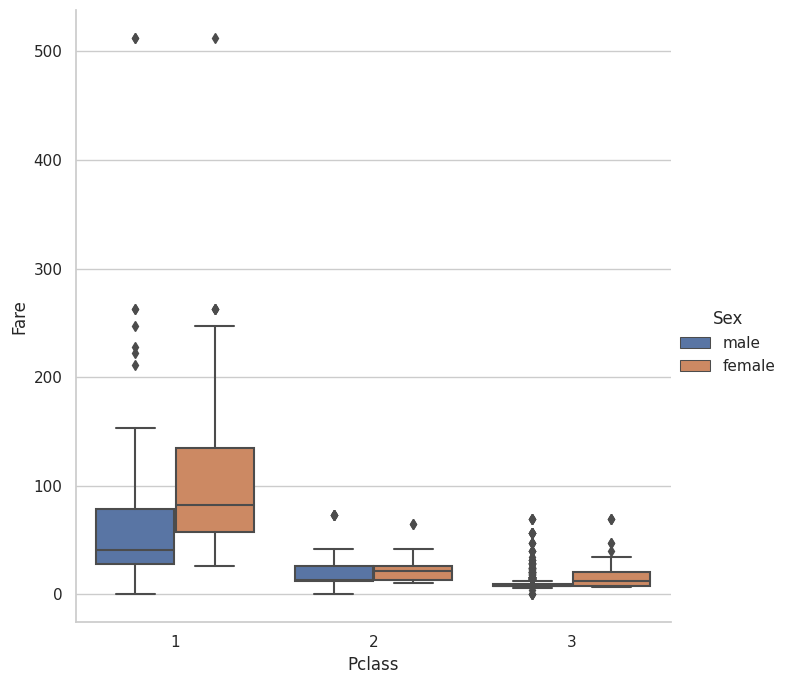

In [12]:
sns.catplot(data=data, x="Pclass", y="Fare", hue="Sex", kind="box",
            height=7)

Histogram showing distribution of passengers by age and sex
There are missing values in the Age column, so we will drop them before plotting.

<Axes: xlabel='Age', ylabel='Count'>

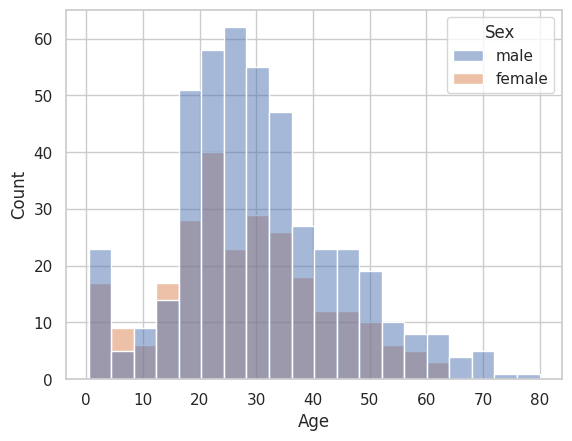

In [13]:
data_clean = data
data_clean.dropna(subset = ['Age'], inplace=True)
sns.histplot(data=data_clean, x="Age", hue="Sex", bins=20)

Histogram showing distribution of passengers by age and passenger class

<Axes: xlabel='Age', ylabel='Count'>

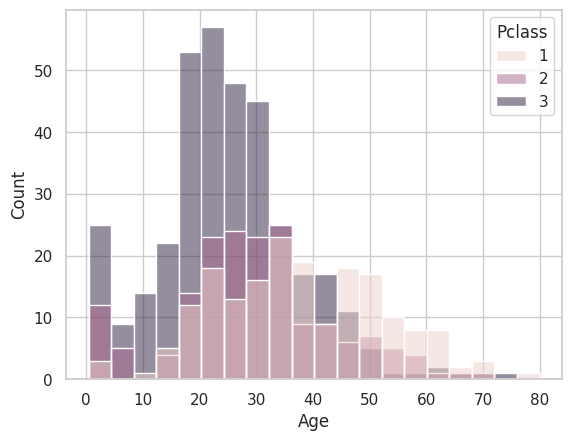

In [14]:
sns.histplot(data=data_clean, x="Age", hue="Pclass", bins=20)